In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
import seaborn as sns

# Estimate Mean

100%|██████████| 1000/1000 [02:13<00:00,  7.47it/s]


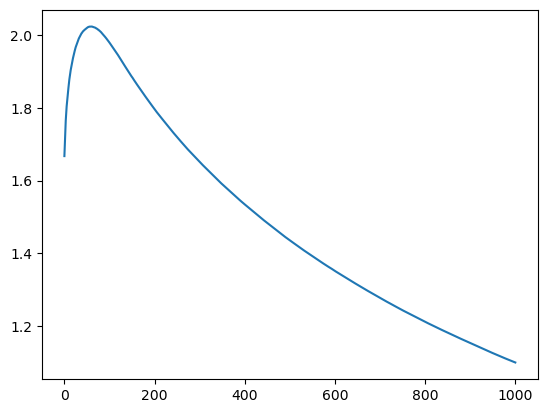

In [2]:
data_dim = 100
gan = GAN(data_dim, 0.1)
gan.dist_init('mu', 0, 5)
gan.data_init(1000, 5)
gan.model_init()
lr_g = 0.01 * data_dim
gan.optimizer_init(lr_d=1, lr_g=lr_g, decay_g=0.9, reg_d=1e-4, reg_g=3e-5,
                   update_D_iter=5, is_mm_alg=False, decay_d=0, grad_clip=1e-3, lr_schedule='exp')
gan.fit(10000, 1e-7, True)
plt.plot(gan.l2_loss)


# Estimate Covariance Matrix

100%|██████████| 1000/1000 [01:11<00:00, 14.00it/s]


1.3920706012965718


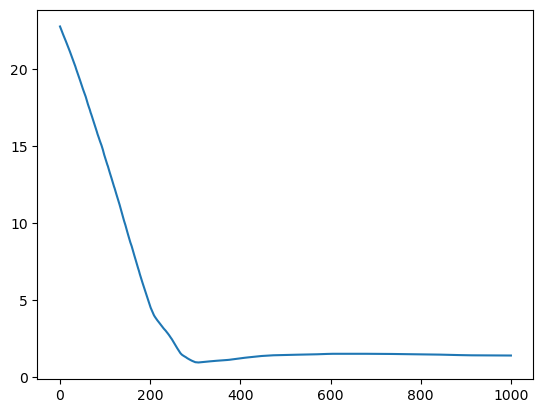

In [25]:
data_dim = 25
gan = GAN(data_dim, 0.2)
gan.dist_init('sigma', 0, 6, sigma_setting='ar')
gan.data_init(1000, 1)
gan.model_init(D_init_option='random', G_init_option='kendall')
lr_g = 0.01 * data_dim
gan.optimizer_init(lr_d=0.9, lr_g=0.25, decay_g=0.2, reg_g=1e-4, reg_d=1e-4,
                    update_D_iter=5, is_mm_alg=False, decay_d=1, grad_clip=1e-3, lr_schedule='step',step=300)
gan.fit(1000, verbose=True)

#plot result
plt.plot(gan.l2_loss)
print(np.array(gan.l2_loss)[-50:].mean())